# Homework exercise 1
## Deadline: upload to Moodle by 15 March 18:00 h

__Suggestion: take this notebook and simply add your code and explanations.__

If you prefer to use .py files, you are expected to also include a PDF containing the output of your code and your explanations. Still, the code needs to be in a form that can be easily run on another computer.

__Name:__

The name of the file that you upload should be *Homework1_YourLastName_YourStudentID*.

Reminder: you are required to attend class on 16 March to earn points for this homework exercise unless you have a valid reason for your absence.

You are expected to work on this exercise on your own. If any part of the questions is unclear, please ask on the Moodle forum.

Please note that you are expected to solve these exercises using Python packages you have encountered in class. In particular, you are expected to write your own functions rather than looking for certainly existing similar code on the web, and you may not use any packages that make available functionality that is similar to what the questions ask you to implement.

If you are not able to answer one of the earlier questions and later questions rely on the answers on the earlier ones, you are allowed to use dummy functions (which yield incorrect answers, e.g. returning random numbers instead of actually doing the required calculations) as input to your answers to later questions.

In [1]:
import numpy as np  
np.random.seed(321)
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#### Building a simple portfolio

Suppose you are a portfolio manager who relies on discounted cash flow analysis of various asset you might invest in.

1. Write a function that takes a list of future cash flows and a discount rate as inputs and returns the fair value of the stream of cash flows. Test the function by computing the values of a few arbitrary example inputs.

In [2]:
def fair_value(li,r): #li=list of cash flows, r=discount factor
    sum=0
    for idx,x in enumerate(li): 
        sum=sum+(x/(1+r)**(idx+1)) #discounts all cfs in list and adds them up 
    return sum
          
print(fair_value([1,1,1,1,1],0.05))

print(fair_value([1,2,3,4,5,6,7],0.05))

print(fair_value([1,2,3,4,5],0.00))

print(fair_value([1],0.3))


4.329476670630819
22.018455127131915
15.0
0.7692307692307692


2. An alternative valuation method that relies on different inputs is the Gordon Growth Model (GGM), which requires only the initial dividend payment, the cost of equity, and the expected growth rate. Please write a function that returns the value of an asset using this model and test it with some examples. The function should return `None` and print an informative error message if the value of the asset is infinite.

In [3]:
def ggm(d,r,g): #d=fixed divident, r=discount factor, g=growth rate
    if (r==g):
        return(print ('invalid values'))
    else:
        v=d/(r-g)
    return v


print(ggm(20,0.05,0.3))
print(ggm(20,0.3,0.3))

-80.0
invalid values
None


3. Based on the functions for a fixed stream of cash flows and for the GGM, it is possible to compute the value of an asset with a list of expected cash flows for a number of years and an expected fixed growth rate afterwards. Please write a functions that implements such a calculation by making use of the previously written functions. Again show some examples demonstrating that the function works.

In [57]:
def combination(li,r,g):
    sum=(fair_value(li[:-1],r))+(ggm(li[-1],r,g))/(1+r)**(len(li)) 
    return sum

print(combination([1,2,3],0.01,0.001))

print(combination([1,2,3,4,5,6,7],0.05,0.03))


326.48074041792955
265.7821513617635


4. Being able to value assets also allows you to decide whether an asset is over- or undervalued. Write a new function that takes the market price as an additional input and that calls, dependent on the input, one of the previously written functions. It should return the over- or undervaluation in percentage terms based on a comparison of the fair value and the current price.

In [53]:
def valuation(li,r,g,mp): #(list or divident payment, discount factor, growth factor, market price)
    if type(li) is list:
        val=(mp-(combination(li,r,g)))/mp
        return val
    else:
        val=(mp-(ggm(li,r,g)))/mp 
        return val

def valuation_2(li,r,g,mp):# in Q5 i could not redirect to the formula above, without getting an error, so i had to write another function
        val=(mp-(combination(li,r,g)))/mp
        return val
   
    


print(valuation([55,34,344],0.08,0.034,1.8286))

print(valuation(3,0.01,0.034,1.8286))



-3289.254856631623
69.35830690145467


5. You are next asked to build a simple portfolio based on the measured over- and undervaluation of stocks. The idea is invest €1 million in a portfolio of undervalued stocks, and to take short positions totalling the same amount in overvalued stocks.

The code below produces some random data of stocks' future profits, long-term earnings growth, cost of capital, and price. You can change some of the parameters in case you find that all stocks turn out to over- or undervalued to assure that you have stocks suitable for long and short positions.

In [54]:
import numpy as np

np.random.seed(1234)

assets = dict()

# cost of capital between 5 and 25 percent
assets['cost_of_capital']=list(0.1+20*np.random.rand(1000))

# profits for some number of years
assets['profit']=list(10*np.random.rand(1000, np.random.randint(2,20)))

# eternal growth after the profit series above ends
assets['longtermgrowth']=list(0.05*np.random.rand(1000))

# current price
assets['price']=list(100*np.random.rand(1000)+10)

#positions
assets['position']=list(positions) #you have to first run the code below in order to add it to the list

#print(assets['position'])

The idea is to build a portfolio where the position sizes are proportional to the mispricing. For example, if you had (only) three stocks the are undervalued, and stock A is undervalued by 10 percent whereas stocks B and C are each undervalued by 20 percent, you would invest €200000 in stock A and €400000 each in stock B and C on the long side of your portfolio. Please insert a list containing the sign and size of your positions with a new key to the `assets` dictionary.

In [58]:
valuations=[]
val_under=[]
val_over=[]
positions=[]
pos_pos=[] 
pos_neg=[] 


k=0 
while k<len(assets['cost_of_capital']):
    val=valuation_2((assets['profit'][k]),assets['cost_of_capital'][k],assets['longtermgrowth'][k],assets['price'][k])
    valuations.append(val)
    if val<0:
        val_under.append(val)
    else:
        val_over.append(val)
    k=k+1
    
j=0
while j<len(valuations):
    if valuations[j]<0:
        sum=(valuations[j])/(np.sum(val_under))*1000000*(-1)#position
        (positions).append(sum)
        (pos_pos).append(sum)
        
    if valuations[j]>0:
        sum=(valuations[j])/(np.sum(val_over))*1000000
        (positions).append(sum)
        print
        (pos_neg).append(sum)
    j=j+1

assets['position']=list(positions)
    
#print(np.sum(pos_pos))
#print(np.sum(pos_neg))

print(pos_pos)
    


  

[-327302.7562604527, -672697.2437395473]


6. Finally, make a scatter plot where each data point consists of the price on the X-axis and the mispricing on the Y-axis.

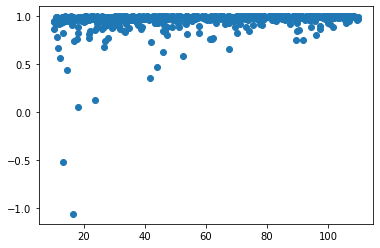

In [59]:
x=assets['price']
y=valuations

plt.scatter(x,y)